#import all the dependency

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score 


#loading the dataset to pandas DataFrame
 

In [ ]:
db=pd.read_csv('diabetes_test.csv')

#printing the first 5 rows of data set

In [ ]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,0,48,20,0,24.7,0.140,22,0
1,6,124,72,0,0,27.6,0.368,29,1
2,5,116,74,29,0,32.3,0.660,35,1
3,0,78,88,29,40,36.9,0.434,21,0
4,11,136,84,35,130,28.3,0.260,42,1


#number of rows and columns in the dataset

In [ ]:
db.shape


(231, 9)

#statistical measure of the data

In [ ]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,3.748918,121.043290,68.974026,20.480519,79.212121,32.051082,0.444823,32.766234,0.350649
std,3.446130,32.219328,18.180238,15.521326,107.466286,7.958735,0.304020,11.938133,0.478210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.650000,0.243000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.400000,0.356000,28.000000,0.000000
75%,6.000000,138.500000,78.000000,33.000000,129.500000,36.400000,0.568000,39.000000,1.000000
max,14.000000,198.000000,122.000000,52.000000,543.000000,57.300000,2.288000,81.000000,1.000000


In [ ]:
db['Outcome'].value_counts()

0    150
1     81
Name: Outcome, dtype: int64

In [ ]:
#checking missing values
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#getting the mean of all those 0 and 1

In [ ]:
db.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.146667,108.880000,68.446667,19.366667,67.320000,30.497333,0.405467,30.786667
1,4.864198,143.567901,69.950617,22.543210,101.234568,34.928395,0.517704,36.432099


In [ ]:
#separating the data and lables
X=db.drop(columns='Outcome',axis=1)
Y=db['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              1        0             48  ...  24.7                     0.140   22
1              6      124             72  ...  27.6                     0.368   29
2              5      116             74  ...  32.3                     0.660   35
3              0       78             88  ...  36.9                     0.434   21
4             11      136             84  ...  28.3                     0.260   42
..           ...      ...            ...  ...   ...                       ...  ...
226            3      106             72  ...  25.8                     0.207   27
227            2      102             86  ...  45.5                     0.127   23
228            3      171             72  ...  33.3                     0.199   24
229            2      146              0  ...  27.5                     0.240   28
230           11      111             84  ...  46.8                     0.925   45

[23

In [ ]:
print(Y)

0      0
1      1
2      1
3      0
4      1
      ..
226    0
227    1
228    1
229    1
230    1
Name: Outcome, Length: 231, dtype: int64


In [ ]:
s=StandardScaler()

In [ ]:
s.fit(X)

StandardScaler()

In [ ]:
sdata=s.transform(X)

In [ ]:
print(sdata)

[[-0.79941469 -3.7650116  -1.15617694 ... -0.92565531 -1.00481736
  -0.90379399]
 [ 0.6546388   0.09196749  0.16680448 ... -0.56048454 -0.25323783
  -0.31616436]
 [ 0.3638281  -0.15686987  0.27705293 ...  0.03134396  0.70931138
   0.18751817]
 ...
 [-0.21779329  1.55388698  0.16680448 ...  0.15726492 -0.81032967
  -0.73589981]
 [-0.50860399  0.77627023 -3.80213978 ... -0.57307663 -0.67517722
  -0.40011145]
 [ 2.10869229 -0.31239322  0.82829518 ...  1.85719784  1.58285776
   1.02698907]]


In [ ]:
X=sdata
Y=db['Outcome']

In [ ]:
print(X)
print(Y)

[[-0.79941469 -3.7650116  -1.15617694 ... -0.92565531 -1.00481736
  -0.90379399]
 [ 0.6546388   0.09196749  0.16680448 ... -0.56048454 -0.25323783
  -0.31616436]
 [ 0.3638281  -0.15686987  0.27705293 ...  0.03134396  0.70931138
   0.18751817]
 ...
 [-0.21779329  1.55388698  0.16680448 ...  0.15726492 -0.81032967
  -0.73589981]
 [-0.50860399  0.77627023 -3.80213978 ... -0.57307663 -0.67517722
  -0.40011145]
 [ 2.10869229 -0.31239322  0.82829518 ...  1.85719784  1.58285776
   1.02698907]]
0      0
1      1
2      1
3      0
4      1
      ..
226    0
227    1
228    1
229    1
230    1
Name: Outcome, Length: 231, dtype: int64


In [ ]:
#test and train data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(231, 8) (184, 8) (47, 8)


In [ ]:
from sklearn.base import ClassifierMixin
#traning the model

In [ ]:
clasifier=svm.SVC(kernel='linear')

In [ ]:
#traning the support vector machine classifier

In [ ]:
clasifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
#accurancy_score on the training data
X_train_predicition = clasifier.predict(X_train)
rain_accurancy=accuracy_score(X_train_predicition,Y_train)

In [ ]:
print('Accurancy score of the data:',train_accurancy)

Accurancy score of the data: 0.7717391304347826


In [ ]:
#accurancy score on the test data
X_test_predicition = clasifier.predict(X_test)
test_accurancy=accuracy_score(X_test_predicition,Y_test)

In [ ]:
print('Accurancy score of the data:',test_accurancy)

Accurancy score of the data: 0.7872340425531915


#making the predicitive system


In [ ]:
input_data=(6,124,72,0,0,27.6,0.368,29)
#changing the input to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array as we are prediciting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#standardize the input
std_data=s.transform(input_data_reshaped)
print(std_data)
prediction=clasifier.predict(std_data)
print(prediction)
if (prediction[0]==0):
  print("The person is not diabetic")
else:
  print('The person is diabetic')

[[ 0.6546388   0.09196749  0.16680448 -1.32237371 -0.73868873 -0.56048454
  -0.25323783 -1.99510616]]
[0]
The person is not diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


#visualization

In [ ]:
import seaborn as sys 

In [ ]:
db.corr()#corelation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.139267,0.187476,-0.094708,-0.092660,0.056809,0.020997,0.572107,0.238337
Glucose,0.139267,1.000000,0.142902,0.077432,0.368036,0.234300,0.120384,0.237019,0.514849
BloodPressure,0.187476,0.142902,1.000000,0.238374,0.099000,0.374698,0.023814,0.250599,0.039560
SkinThickness,-0.094708,0.077432,0.238374,1.000000,0.524943,0.443269,0.105012,-0.181145,0.097869
Insulin,-0.092660,0.368036,0.099000,0.524943,1.000000,0.299385,0.103066,-0.102012,0.150915
BMI,0.056809,0.234300,0.374698,0.443269,0.299385,1.000000,0.034634,-0.018338,0.266245
DiabetesPedigreeFunction,0.020997,0.120384,0.023814,0.105012,0.103066,0.034634,1.000000,-0.018141,0.176544
Age,0.572107,0.237019,0.250599,-0.181145,-0.102012,-0.018338,-0.018141,1.000000,0.226141
Outcome,0.238337,0.514849,0.039560,0.097869,0.150915,0.266245,0.176544,0.226141,1.000000


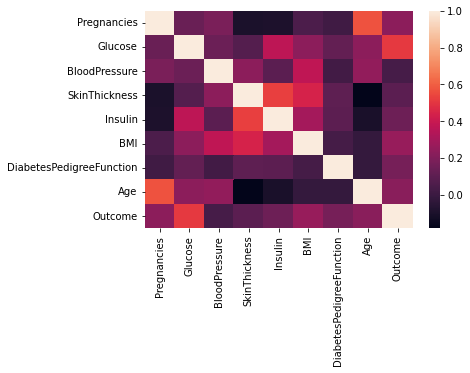

In [ ]:
sys.heatmap(db.corr())#heat map is used to find correlation b/w two columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


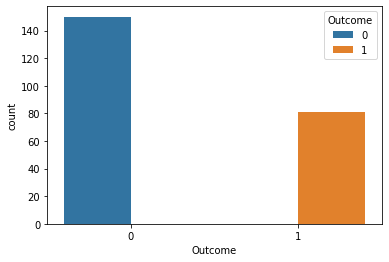

In [ ]:
sys.countplot("Outcome",data=db,hue="Outcome")

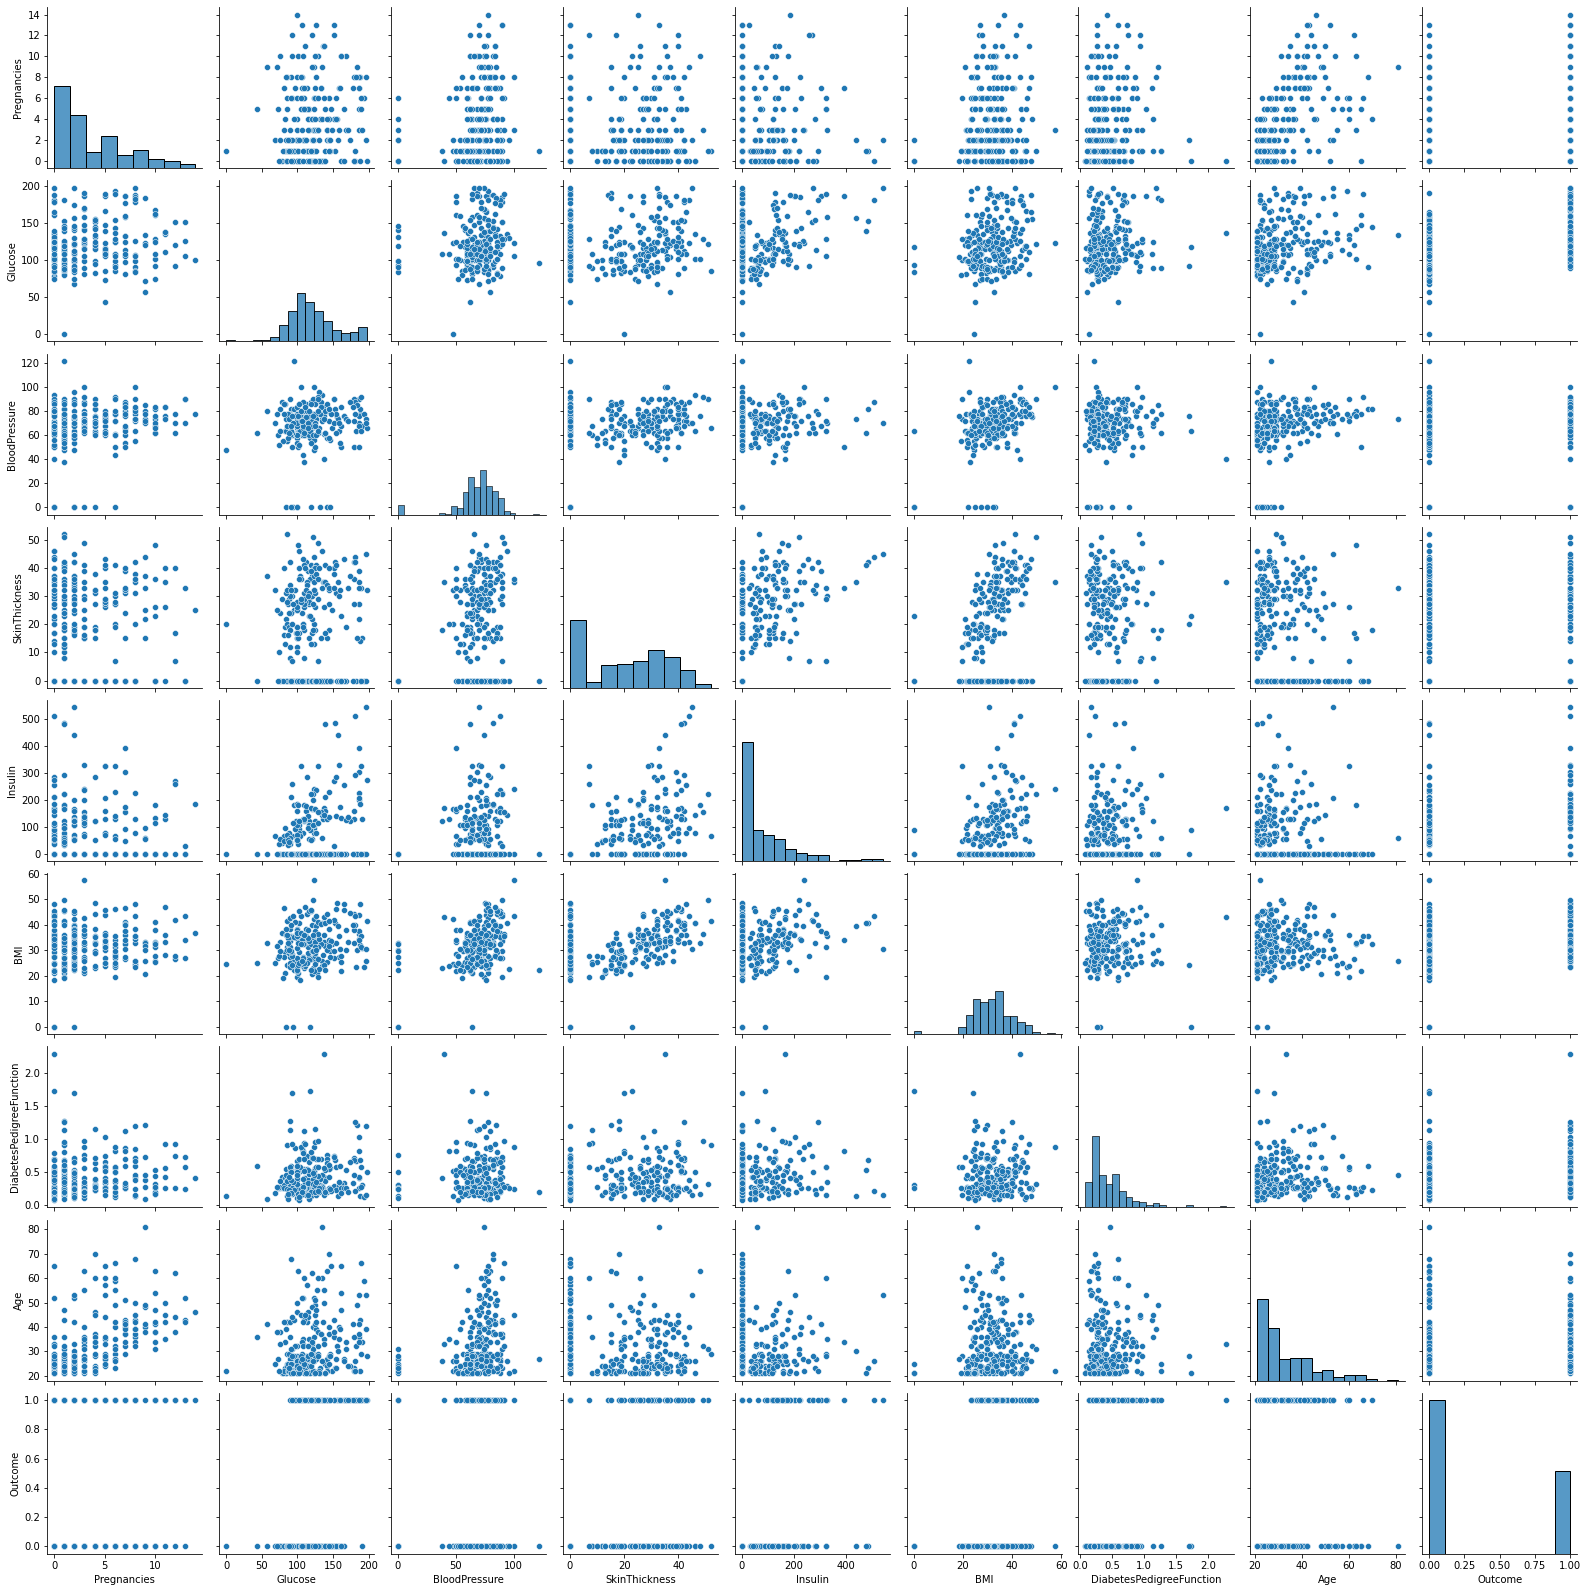

In [ ]:
sys.pairplot(db)

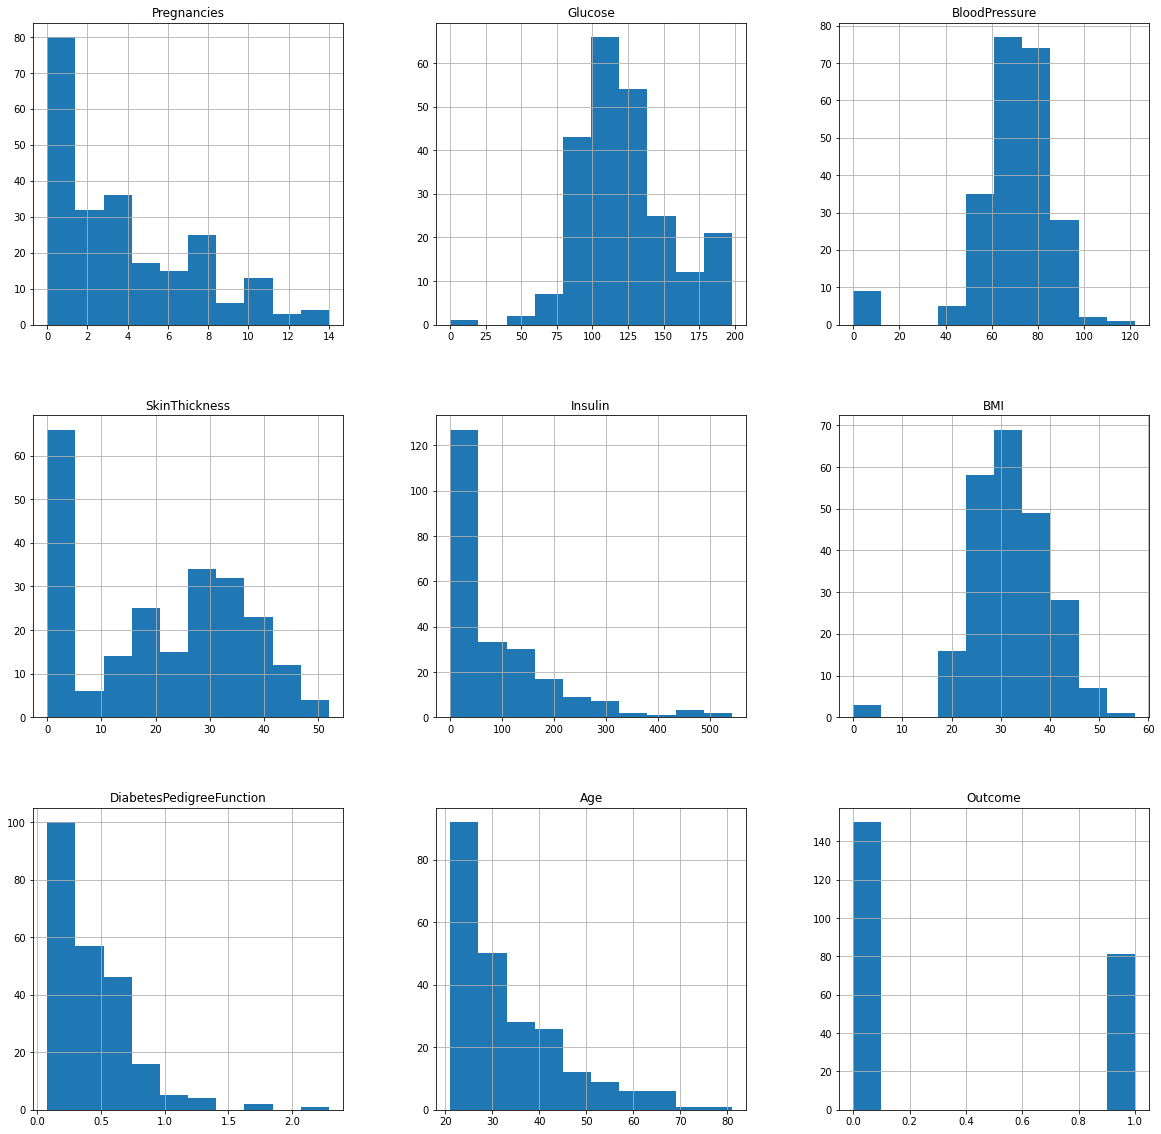

In [ ]:
p=db.hist(figsize=(20,20))